In [2]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import numpy as np
sciezka = open(r'ankieta.csv')
ankieta = pd.read_csv(sciezka, sep = ';', encoding = 'Latin2')

In [3]:
ankieta.dropna() #missing data
print(ankieta)

    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK
0      IT     2      Nie      1     -2      1    M    64
1      IT     2      Nie      0     -2     -2    M    67
2      IT     2      Nie      1      2      2    M    65
3      IT     2      Nie     -1     -2     -2    K    68
4      IT     3      Tak      1      2     -1    K    65
..    ...   ...      ...    ...    ...    ...  ...   ...
195    HR     2      Nie      1      2      2    M    42
196    HR     2      Nie      1     -1     -1    K    35
197    HR     2      Nie     -1     -2     -2    K    39
198    HR     2      Nie      1      2      1    K    48
199    HR     2      Nie      1      2      2    K    42

[200 rows x 8 columns]


In [4]:
bins = [0, 35, 45, 55, float("inf")]
labels = ["<35", "36-45", "46-55", ">55"]
WIEK_KAT = pd.cut(ankieta["WIEK"], bins=bins, labels=labels)
ankieta['WIEK_KAT'] = WIEK_KAT
print(ankieta)

    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK WIEK_KAT
0      IT     2      Nie      1     -2      1    M    64      >55
1      IT     2      Nie      0     -2     -2    M    67      >55
2      IT     2      Nie      1      2      2    M    65      >55
3      IT     2      Nie     -1     -2     -2    K    68      >55
4      IT     3      Tak      1      2     -1    K    65      >55
..    ...   ...      ...    ...    ...    ...  ...   ...      ...
195    HR     2      Nie      1      2      2    M    42    36-45
196    HR     2      Nie      1     -1     -1    K    35      <35
197    HR     2      Nie     -1     -2     -2    K    39    36-45
198    HR     2      Nie      1      2      1    K    48    46-55
199    HR     2      Nie      1      2      2    K    42    36-45

[200 rows x 9 columns]


In [5]:
# Tabela liczności
print(ankieta["DZIAŁ"].value_counts()) 
print('-------------------')
print(ankieta["STAŻ"].value_counts()) 
print('-------------------')
print(ankieta["CZY_KIER"].value_counts()) 
print('-------------------')
print(ankieta["PŁEĆ"].value_counts()) 
print('-------------------')
print(ankieta["WIEK_KAT"].value_counts()) 

DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64
-------------------
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64
-------------------
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64
-------------------
PŁEĆ
M    129
K     71
Name: count, dtype: int64
-------------------
WIEK_KAT
36-45    104
46-55     45
<35       26
>55       25
Name: count, dtype: int64


       count
PYT_1       
 1       100
 0        40
 2        29
-1        17
-2        14
       count
PYT_2       
 2       104
-2        74
-1        20
 1         2


<Axes: xlabel='PYT_2'>

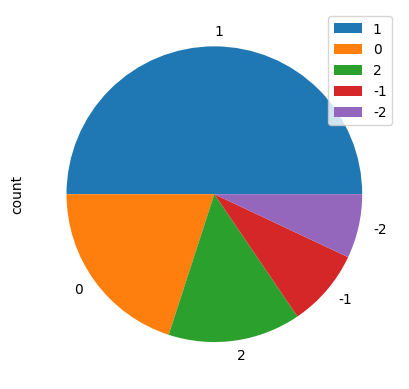

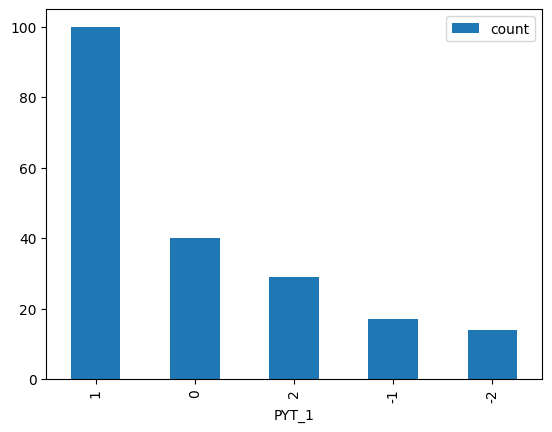

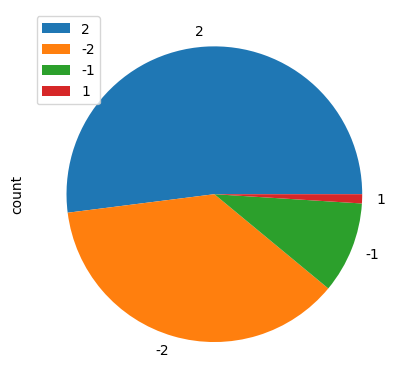

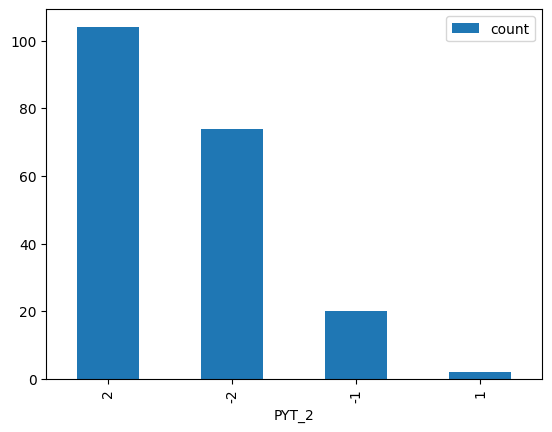

In [6]:
# Wykresy
pyt1 = pd.DataFrame(ankieta['PYT_1'].value_counts())
print(pyt1)
pyt1.plot.pie(subplots=True)
pyt1.plot.bar()

pyt2 = pd.DataFrame(ankieta['PYT_2'].value_counts())
print(pyt2)
pyt2.plot.pie(subplots=True)
pyt2.plot.bar()

In [7]:
# Tablica wielodzielcza
print(pd.crosstab(ankieta['PYT_1'], ankieta['DZIAŁ']))
print(pd.crosstab(ankieta['PYT_1'], ankieta['STAŻ']))
print(pd.crosstab(ankieta['PYT_1'], ankieta['CZY_KIER']))
print(pd.crosstab(ankieta['PYT_1'], ankieta['PŁEĆ']))
print(pd.crosstab(ankieta['PYT_1'], ankieta['WIEK_KAT']))

print(pd.crosstab(ankieta['PYT_2'], ankieta['PYT_3']))

DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18
WIEK_KAT  <35  36-45  46-55  >55
PYT_1                           
-2          1     11      2    0
-1          6      7      1    3
 0          3     24      5    8
 1         13     50     25   12
 2          3     12     12    2
PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81


In [8]:
#7
ankieta['CZY_ZADOW'] = pd.cut(ankieta['PYT_1'], bins=[-2.5, -0.5, 0.5, 2.5], labels=['Niezadowolony', 'Nie ma zdania', 'Zadowolony'])
print(ankieta[['PYT_1', 'CZY_ZADOW']])

     PYT_1      CZY_ZADOW
0        1     Zadowolony
1        0  Nie ma zdania
2        1     Zadowolony
3       -1  Niezadowolony
4        1     Zadowolony
..     ...            ...
195      1     Zadowolony
196      1     Zadowolony
197     -1  Niezadowolony
198      1     Zadowolony
199      1     Zadowolony

[200 rows x 2 columns]


(<Figure size 640x480 with 3 Axes>,
 {('Zadowolony', 'IT'): (0.0, 0.0, 0.6386138613861386, 0.15350372246526978),
  ('Zadowolony', 'PD'): (0.0,
   0.15680405249827306,
   0.6386138613861386,
   0.47586153964233635),
  ('Zadowolony', 'MK'): (0.0,
   0.6359659221736128,
   0.6386138613861386,
   0.19187965308158725),
  ('Zadowolony', 'HR'): (0.0,
   0.8311459052882033,
   0.6386138613861386,
   0.16885409471179674),
  ('Nie ma zdania', 'IT'): (0.6435643564356436,
   0.0,
   0.19801980198019797,
   0.09900990099009901),
  ('Nie ma zdania', 'PD'): (0.6435643564356436,
   0.10231023102310231,
   0.19801980198019797,
   0.42079207920792083),
  ('Nie ma zdania', 'MK'): (0.6435643564356436,
   0.5264026402640265,
   0.19801980198019797,
   0.3465346534653465),
  ('Nie ma zdania', 'HR'): (0.6435643564356436,
   0.8762376237623762,
   0.19801980198019797,
   0.12376237623762376),
  ('Niezadowolony', 'IT'): (0.8465346534653465,
   0.0,
   0.1534653465346535,
   0.06387735547748323),
  ('Niezadowol

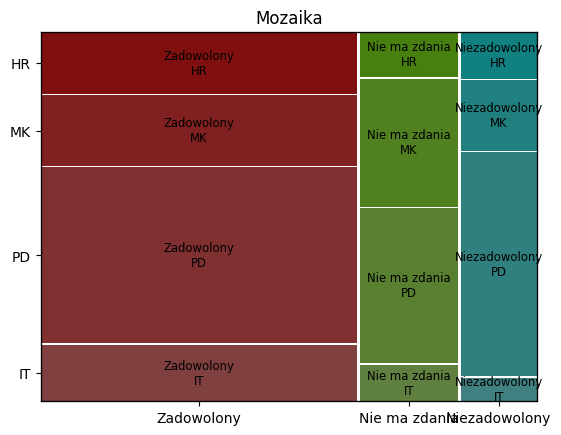

In [9]:
mosaic(ankieta, ["CZY_ZADOW", "DZIAŁ"], title='Mozaika')

# ZADANIE 2
Zilustruj odpowiedzi na pytanie "Jak bardzo zgadzasz si˛e ze stwierdzeniem, ze firma ˙
pozwala na (...)?" (zmienna PYT_1) w całej badanej grupie oraz w podgrupach ze wzgl˛edu
na zmienn ˛a CZY_KIER. W tym celu mozesz zaproponowa ˙ c własne metody wizualizacji lub ´
zapozac si˛e z bibliotek ˛a ´ likert i dost˛epnymi tam funkcjami summary oraz plot (jesli korzystarz ´
z R) oraz z bibliotek ˛a Altair lub plot-likert (jesli korzystarz z Pythona).

In [10]:
import altair as alt

In [11]:
df_all = ankieta.groupby("PYT_1").size().reset_index(name="Liczność")
df_all["CZY_KIER"] = "Wszyscy"  # Dodaj kategorię dla całej grupy

# Grupowanie danych – podział względem CZY_KIER
df_groups = ankieta.groupby(["CZY_KIER", "PYT_1"]).size().reset_index(name="Liczność")

# Połączenie obu zbiorów w jeden
df = pd.concat([df_all, df_groups])

# Konwersja zmiennej CZY_KIER na czytelne etykiety
df["CZY_KIER"] = df["CZY_KIER"].replace({0: "Pracownik", 1: "Kierownik"})

# Tworzenie wykresu
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X("PYT_1:N", title="Odpowiedzi na pytanie PYT_1"),
    y=alt.Y("Liczność:Q", title="Liczba odpowiedzi"),
    color=alt.Color("CZY_KIER:N", title="Grupa badana"),
    column=alt.Column("CZY_KIER:N", title="Podział na grupy")
).properties(
    title="Rozkład odpowiedzi na pytanie PYT_1"
)

chart

C:\Users\ameli\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# ZADANIE 3
Przetestuj działanie random.choice albo sample z numpy dla róznych wartości argumentów wejsciowych. Następnie wylosuj próbkę o liczności 10% wszystkich rekordów z pliku "ankieta.csv" w dwóch wersjach: ze zwracaniem oraz bez zwracania.


In [12]:
# Liczba rekordów w pliku
sample_size = int(0.1 * len(ankieta))  # 10% danych

# Losowanie BEZ zwracania (każdy rekord może być wybrany tylko raz)
sample_no_replace = ankieta.sample(n=sample_size, replace=False, random_state=42)

# Losowanie ZE zwracaniem (mogą pojawiać się duplikaty)
sample_with_replace = ankieta.sample(n=sample_size, replace=True, random_state=42)

# Wyświetlenie próbek
print("Próbka bez zwracania:")
print(sample_no_replace.head())

print("\nPróbka ze zwracaniem:")
print(sample_with_replace.head())

Próbka bez zwracania:
    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK WIEK_KAT  \
95     PD     2      Nie     -2     -2     -1    M    36    36-45   
15     IT     2      Nie      1      2      2    K    37    36-45   
30     PD     1      Nie      1      2      2    M    32      <35   
158    MK     2      Nie      0     -2     -2    M    64      >55   
128    MK     2      Nie     -1     -2     -2    K    36    36-45   

         CZY_ZADOW  
95   Niezadowolony  
15      Zadowolony  
30      Zadowolony  
158  Nie ma zdania  
128  Niezadowolony  

Próbka ze zwracaniem:
    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK WIEK_KAT  \
102    PD     2      Nie      0     -2     -2    K    40    36-45   
179    HR     2      Nie      0     -2     -1    M    44    36-45   
92     PD     2      Nie      2      2      2    M    37    36-45   
14     IT     2      Nie      0     -2     -2    K    54    46-55   
106    PD     2      Nie      0     -2     -2    K    43    36-45   


# ZADANIE 4
Zaproponuj metodę symulowania zmiennych losowych z rozkładu dwumianowego. Napisz funkcję do generowania realizacji, a nast˛epnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartosci paramertów rozkładu: n i p.

In [13]:
import numpy as np
import random

k = 10000

def fu(n, p, k):
    vec = np.zeros(k)  # Wektor wynikowy

    for i in range(k):
        samp = random.choices(range(n), k=n)  # Losowanie z powtórzeniami (symulacja n prób)
        success = sum(1 for _ in samp if random.random() < p)  # Liczenie sukcesów
        vec[i] = success # Zapis do wektora

    return vec 

print(fu(1000, 1/2, k))
print(np.mean(fu(1000, 1/2, k)), 
      np.var(fu(1000, 1/2, k)))

[514. 525. 515. ... 502. 488. 481.]
499.8816 246.521975


# ZADANIE 5
Zaproponuj metod˛e symulowania wektorów losowych z rozkładu wielomianowego.
Napisz funkcj˛e do generowania realizacji, a nast˛epnie zaprezentuj jej działanie porównuj ˛ac
wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartosci paramertów ´
rozkładu: n i p.

Średnia empiryczna: [2.0055 3.0206 4.9739]
Średnia teoretyczna: [2. 3. 5.]
Wariancja empiryczna: [1.59186975 2.07737564 2.49161879]
Wariancja teoretyczna: [1.6 2.1 2.5]


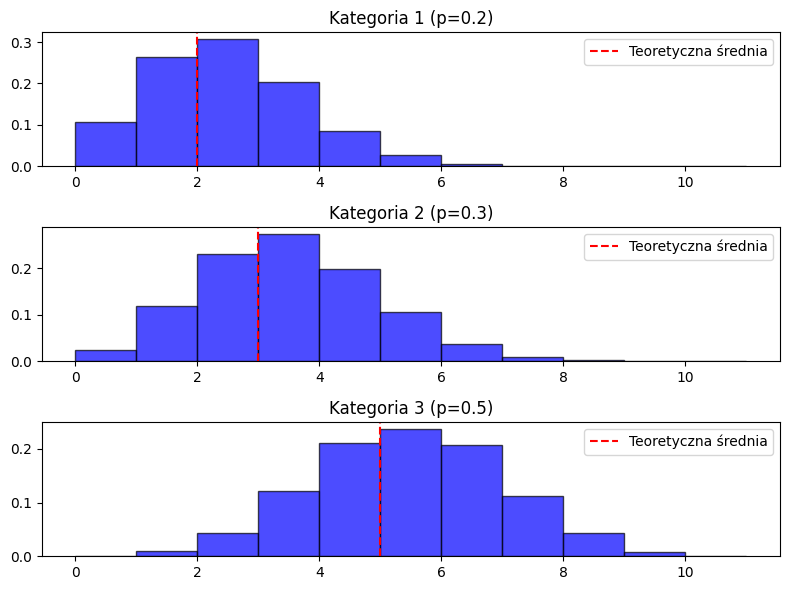

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def symuluj_multinomial(n, p, num_samples=10000):
    """
    Generuje realizacje rozkładu wielomianowego.
    
    :param n: liczba prób w pojedynczej realizacji
    :param p: wektor prawdopodobieństw (musi sumować się do 1)
    :param num_samples: liczba realizacji do wygenerowania
    :return: macierz próbek (num_samples x k)
    """
    k = len(p)  # liczba kategorii
    samples = np.random.multinomial(n, p, size=num_samples)
    return samples

# Przykładowe parametry
n = 10  # liczba prób
p = [0.2, 0.3, 0.5]  # prawdopodobieństwa dla 3 kategorii

# Symulacja
samples = symuluj_multinomial(n, p, num_samples=10000)

# Empiryczna średnia i wariancja
emp_mean = np.mean(samples, axis=0)
emp_var = np.var(samples, axis=0)

# Teoretyczna średnia i wariancja
theo_mean = np.array(n * np.array(p))
theo_var = np.array(n * np.array(p) * (1 - np.array(p)))

print(f"Średnia empiryczna: {emp_mean}")
print(f"Średnia teoretyczna: {theo_mean}")
print(f"Wariancja empiryczna: {emp_var}")
print(f"Wariancja teoretyczna: {theo_var}")

# Wykres histogramu dla każdej kategorii
fig, ax = plt.subplots(len(p), 1, figsize=(8, 6))
for i in range(len(p)):
    ax[i].hist(samples[:, i], bins=range(n+2), density=True, alpha=0.7, color='b', edgecolor='black')
    ax[i].axvline(theo_mean[i], color='r', linestyle='dashed', label="Teoretyczna średnia")
    ax[i].set_title(f"Kategoria {i+1} (p={p[i]})")
    ax[i].legend()
plt.tight_layout()
plt.show()


# Część 3


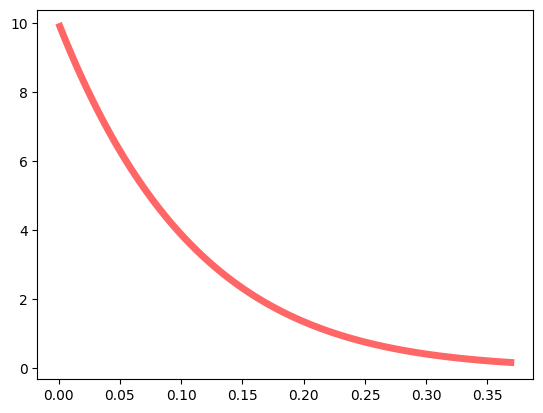

In [20]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, b = 1, 10
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

In [38]:
import scipy.stats as stats
import numpy as np

def clopper(confidence, successes=None, trials=None, data=None):
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    alpha = 1 - confidence
    lower = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return lower, upper

In [39]:
print(clopper(0.95, successes=5, trials=10))
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
print(clopper(0.95, data=data))

(0.18708602844739855, 0.8129139715526015)
(0.2623780766069451, 0.8784477418801728)


In [50]:
ankieta['CZY_ZADOW'] = pd.cut(ankieta['PYT_2'], bins=[-2.5, 0.5, 2.5], labels=[0, 1])
ankieta['CZY_ZADOW_2'] = pd.cut(ankieta['PYT_3'], bins=[-2.5, 0.5, 2.5], labels=[0,  1])

a = 0.05
data1 = ankieta[['CZY_ZADOW']].to_numpy()
data2 = ankieta[['CZY_ZADOW_2']].to_numpy()

print('Przed:', clopper(confidence=1-a, data=data1), '\nPo:', clopper(confidence=1-a, data=data2))


Przed: (0.45833050041147494, 0.6007670588028855) 
Po: (0.5184215852127789, 0.6588693543285322)


# zadanie 9. 
Przeprowad´z symulacje, których celem jest porównanie prawdopodobienstwa ´
pokrycia i długosci przedziałów ufno ´ sci Cloppera-Pearsona, Walda i trzeciego dowolnego ´
typu zaimplementowanego w wybranej funkcji. Rozwaz 1 ˙ − α = 0.95, rozmiar próby n ∈
{30,100,1000} i rózne warto ˙ sci prawdopodobie ´ nstwa ´ p. Wyniki umies´c na wykresach i ´
sformułuj wnioski, które dla konkretnych danych ułatwi ˛a wybór konkretenego typu przedziału
ufnosci.
z ´ binomial z biblioteki
random oraz stats.proportion.proportion_confint z biblioteki statsmodels

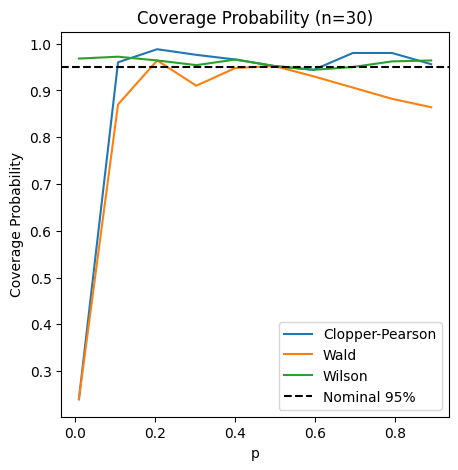

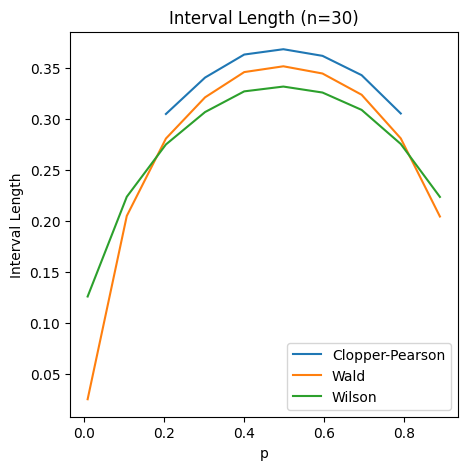

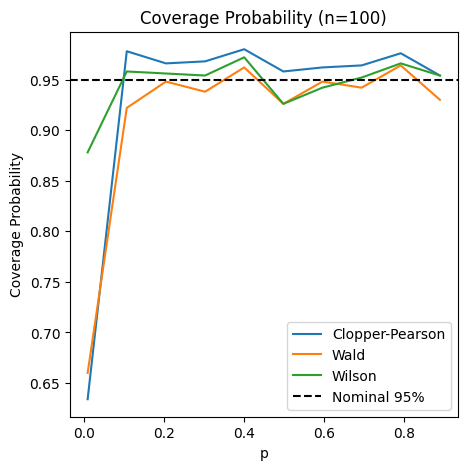

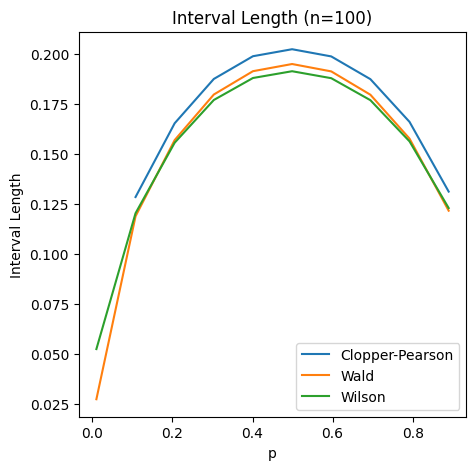

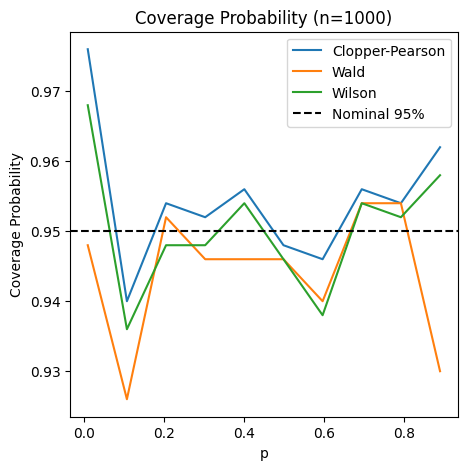

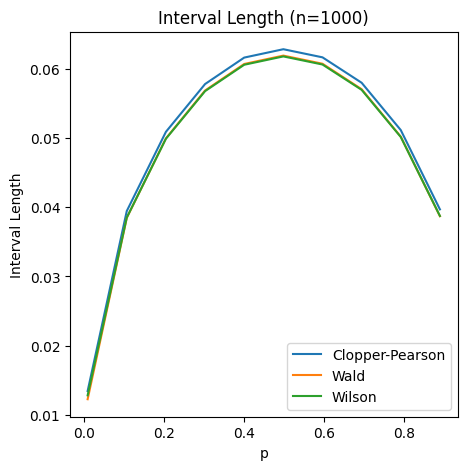

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def clopper_pearson(x, n, alpha=0.05):
    lower = stats.beta.ppf(alpha/2, x, n-x+1)
    upper = stats.beta.ppf(1-alpha/2, x+1, n-x)
    return lower, upper

def wald(x, n, alpha=0.05):
    p_hat = x / n
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    z = stats.norm.ppf(1 - alpha / 2)
    lower = p_hat - z * se
    upper = p_hat + z * se
    return max(0, lower), min(1, upper)

def wilson(x, n, alpha=0.05):
    p_hat = x / n
    z = stats.norm.ppf(1 - alpha / 2)
    denominator = 1 + z**2 / n
    center = (p_hat + z**2 / (2*n)) / denominator
    margin = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4*n)) / n) / denominator
    return max(0, center - margin), min(1, center + margin)

def simulate(n, p, alpha=0.05, N=500):
    coverage = {"Clopper-Pearson": 0, "Wald": 0, "Wilson": 0}
    lengths = {"Clopper-Pearson": [], "Wald": [], "Wilson": []}
    
    for _ in range(N):
        x = np.random.binomial(n, p)
        
        for method, func in zip(["Clopper-Pearson", "Wald", "Wilson"],
                                [clopper_pearson, wald, wilson]):
            lower, upper = func(x, n, alpha)
            if lower <= p <= upper:
                coverage[method] += 1
            lengths[method].append(upper - lower)
    
    for key in coverage:
        coverage[key] /= N
        lengths[key] = np.mean(lengths[key])
    
    return coverage, lengths

def run_experiment():
    ns = [30, 100, 1000]
    ps = np.linspace(0.01, 0.89, 10)
    alpha = 0.05
    results = {}
    
    for n in ns:
        results[n] = {"coverage": {}, "lengths": {}}
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            results[n]["coverage"][method] = []
            results[n]["lengths"][method] = []
        
        for p in ps:
            coverage, lengths = simulate(n, p, alpha)
            for method in coverage:
                results[n]["coverage"][method].append(coverage[method])
                results[n]["lengths"][method].append(lengths[method])
    
    plot_results(ps, results, ns)

def plot_results(ps, results, ns):
    for n in ns:
        plt.figure(figsize=(5, 5))
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            plt.plot(ps, results[n]["coverage"][method], label=f"{method}")
        plt.axhline(0.95, color='black', linestyle='dashed', label='Nominal 95%')
        plt.xlabel("p")
        plt.ylabel("Coverage Probability")
        plt.title(f"Coverage Probability (n={n})")
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(5, 5))
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            plt.plot(ps, results[n]["lengths"][method], label=f"{method}")
        plt.xlabel("p")
        plt.ylabel("Interval Length")
        plt.title(f"Interval Length (n={n})")
        plt.legend()
        plt.show()
        
run_experiment()